## Import and Packages

In [13]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## The Codes

In [2]:
bos_hou = load_boston()

In [3]:
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


C:\Users\m477a\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

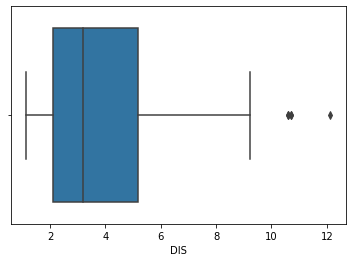

In [5]:
# boxplot
sns.boxplot(df_boston['DIS'])

In [8]:
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


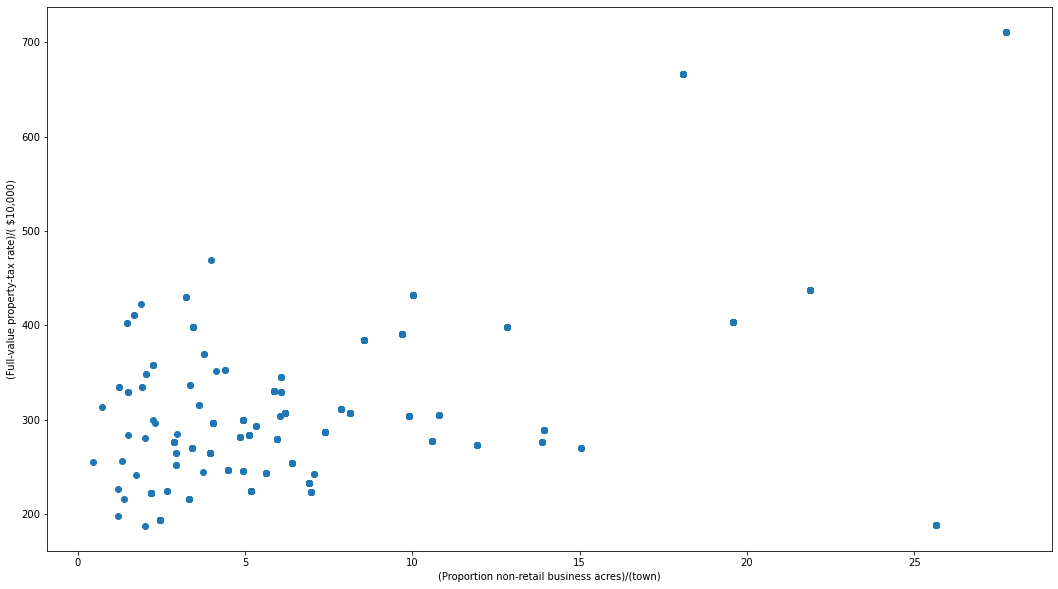

In [9]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [10]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492], dtype=int64),)


 Note: Z- Score is also called a standard score. 
 This value/score helps to understand that how far
 is the data point from the mean. And after setting 
 up a threshold value one can utilize z score values
 of data points to define the outliers.
 
 Zscore = (data_point -mean) / std. deviation

In [14]:
# Z score
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

[1.40213603e-01 5.57159875e-01 5.57159875e-01 1.07773662e+00
 1.07773662e+00 1.07773662e+00 8.39243922e-01 1.02463789e+00
 1.08719646e+00 1.32963473e+00 1.21297914e+00 1.15593484e+00
 7.87143464e-01 4.33754047e-01 3.17003386e-01 3.34449434e-01
 3.34449434e-01 2.20028082e-01 6.92761271e-04 6.92761271e-04
 1.35827806e-03 1.03277421e-01 8.64493539e-02 1.42685523e-01
 2.87387889e-01 3.13533191e-01 4.21632134e-01 3.12962749e-01
 3.13580728e-01 2.11043605e-01 2.08191390e-01 1.80619980e-01
 9.26766896e-02 3.72817172e-03 1.67532861e-02 2.06663257e-01
 1.98296760e-01 6.61510917e-02 2.48415135e-02 7.63470081e-01
 7.63470081e-01 9.15493132e-01 9.15493132e-01 9.15493132e-01
 9.15493132e-01 6.20526581e-01 6.20526581e-01 9.00519004e-01
 9.86370670e-01 1.08985853e+00 1.43545190e+00 1.43545190e+00
 1.43545190e+00 1.43545190e+00 1.67551331e+00 2.33004908e+00
 2.56345533e+00 2.15330683e+00 1.91086857e+00 1.49121270e+00
 1.63068600e+00 1.43725830e+00 1.63073354e+00 1.98982739e+00
 2.58023586e+00 1.338856

Note: Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [15]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([351, 352, 353, 354, 355], dtype=int64),)


Note: IQR, Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

In [19]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print('Q1  : ',Q1)
print('Q3  : ',Q3)
print('IQR : ',IQR)

Q1  :  2.1003499999999997
Q3  :  5.16495
IQR :  3.0646000000000004


Note:  To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered)

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In [20]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


# Removing the Outliers

Note: For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [21]:
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

Old Shape:  (506, 13)
New Shape:  (501, 13)
